<a href="https://colab.research.google.com/github/l-Monarch-l/Laborat/blob/main/%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install pandas scikit-learn seaborn scipy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
try:
    df = pd.read_csv('/content/heart.csv')
except FileNotFoundError:
    df = pd.read_csv('heart.csv')

y = df['CL_STATUS'] # выбираем целевую переменную (количественная)
X = df.drop('CL_STATUS', axis=1) # переменные для проверки влияния

In [3]:
X

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,42,1,110,65,64,147,291,2,4,120,78,271,146,2,1
1,53,1,130,72,69,167,278,1,2,122,68,250,165,9,1
2,53,2,120,90,70,222,342,4,1,132,90,304,223,2,1
3,48,4,120,80,72,229,239,4,2,118,68,209,227,3,1
4,53,3,118,74,66,134,243,3,5,118,56,261,138,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,148,300,2,1,115,65,273,152,0,0
196,23,1,110,70,69,137,120,3,2,112,76,198,153,0,0
197,20,3,130,80,66,150,210,5,1,130,85,274,158,0,0
198,46,3,140,84,66,138,130,4,2,148,88,160,157,0,0


In [4]:
# Создаем копию данных
category_columns: list[str] = X.select_dtypes(include=['object']).columns # собираем колонки помеченные как object

# Применяем One-Hot Encoding к категориальным столбцам, исключая первую категорию (drop_first=True)
X = pd.get_dummies(X, columns=category_columns,drop_first=True)

In [5]:
X

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,42,1,110,65,64,147,291,2,4,120,78,271,146,2,1
1,53,1,130,72,69,167,278,1,2,122,68,250,165,9,1
2,53,2,120,90,70,222,342,4,1,132,90,304,223,2,1
3,48,4,120,80,72,229,239,4,2,118,68,209,227,3,1
4,53,3,118,74,66,134,243,3,5,118,56,261,138,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,148,300,2,1,115,65,273,152,0,0
196,23,1,110,70,69,137,120,3,2,112,76,198,153,0,0
197,20,3,130,80,66,150,210,5,1,130,85,274,158,0,0
198,46,3,140,84,66,138,130,4,2,148,88,160,157,0,0


In [6]:
df_corr_test = X.copy()

# Добавляем целевую переменную в копию данных
df_corr_test['y'] = y
df_corr_test

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH,y
0,42,1,110,65,64,147,291,2,4,120,78,271,146,2,1,8
1,53,1,130,72,69,167,278,1,2,122,68,250,165,9,1,6
2,53,2,120,90,70,222,342,4,1,132,90,304,223,2,1,8
3,48,4,120,80,72,229,239,4,2,118,68,209,227,3,1,8
4,53,3,118,74,66,134,243,3,5,118,56,261,138,2,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,148,300,2,1,115,65,273,152,0,0,8
196,23,1,110,70,69,137,120,3,2,112,76,198,153,0,0,8
197,20,3,130,80,66,150,210,5,1,130,85,274,158,0,0,0
198,46,3,140,84,66,138,130,4,2,148,88,160,157,0,0,6


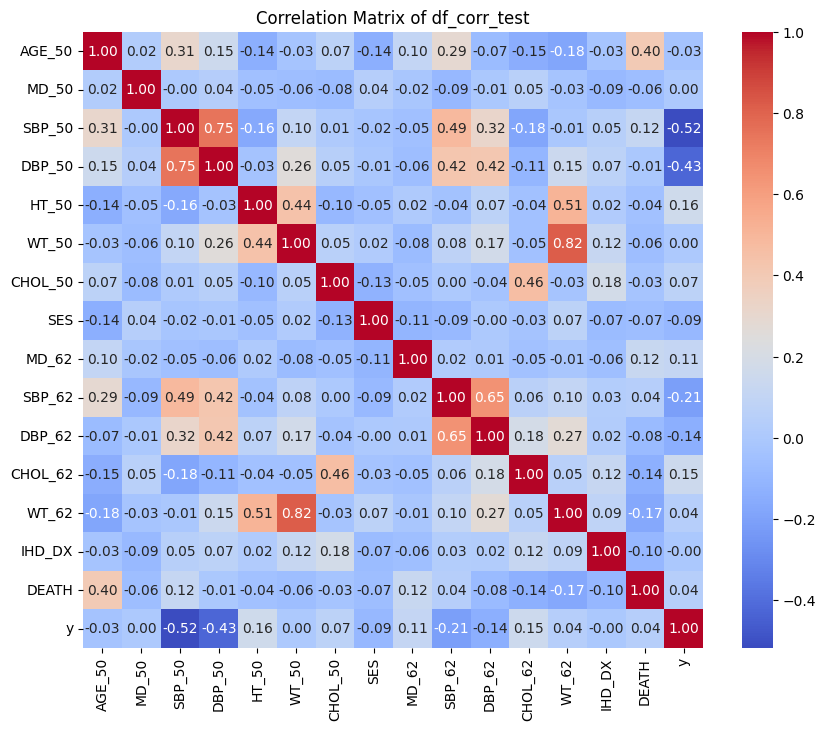

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что у вас уже есть DataFrame под названием df_corr_test
# Выводим матрицу корреляции (только для числовых столбцов)
correlation_matrix = df_corr_test.select_dtypes(['int', 'float']).corr()

# Отображаем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of df_corr_test")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def resolve_regression(X, y, regularization=None):
    """
    Выполняет регрессию с учетом регуляризации.

    Parameters:
    - X: Входные данные (признаки).
    - y: Целевые значения.
    - regularization: Тип регуляризации ('l1', 'l2', None). Если None, используется обычная линейная регрессия.
    """
    # Разделение данных на обучающую и тестовую выборки (80% / 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Инициализация модели в зависимости от типа регуляризации
    if regularization == 'l1':
        model = Lasso() # L1-регуляризация (Lasso)
    elif regularization == 'l2':
        model = Ridge() # L2-регуляризация (Ridge)
    else:
        model = LinearRegression() # Линейная регрессия без регуляризации

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрик качества
    mae = mean_absolute_error(y_test, y_pred) # Средняя абсолютная ошибка
    mse = mean_squared_error(y_test, y_pred)  # Средняя квадратичная ошибка
    r2 = r2_score(y_test, y_pred)             # Коэффициент детерминации (R^2)

    # Вывод результатов
    print(f"Regularization: {regularization}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    return model, X_train, X_test, y_train, y_test

In [9]:
resolve_regression(X, y)
None

Regularization: None
Mean Absolute Error (MAE): 0.47
Mean Squared Error (MSE): 0.64
R^2 Score: 0.05


In [10]:
resolve_regression(X[['SBP_50', 'DBP_50']], y)
None

Regularization: None
Mean Absolute Error (MAE): 0.40
Mean Squared Error (MSE): 0.49
R^2 Score: 0.27


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   AGE_50   200 non-null    int64
 1   MD_50    200 non-null    int64
 2   SBP_50   200 non-null    int64
 3   DBP_50   200 non-null    int64
 4   HT_50    200 non-null    int64
 5   WT_50    200 non-null    int64
 6   CHOL_50  200 non-null    int64
 7   SES      200 non-null    int64
 8   MD_62    200 non-null    int64
 9   SBP_62   200 non-null    int64
 10  DBP_62   200 non-null    int64
 11  CHOL_62  200 non-null    int64
 12  WT_62    200 non-null    int64
 13  IHD_DX   200 non-null    int64
 14  DEATH    200 non-null    int64
dtypes: int64(15)
memory usage: 23.6 KB


In [12]:
import pandas as pd
import numpy as np

def select_features_correlation(X, y, max_features=5):
    # Вычисляем корреляцию признаков с целевой переменной
    correlation = X.apply(lambda col: np.abs(col.corr(y)))

    # Отбираем top-N признаков с наибольшей корреляцией
    top_features = correlation.nlargest(max_features).index

    # Возвращаем X и y с отобранными признаками
    return X[top_features], y

In [13]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def select_features_rfe(X, y, max_features=5):
    # Инициализация модели линейной регрессии
    model = LinearRegression()

    # RFE с указанным количеством признаков
    selector = RFE(model, n_features_to_select=max_features)
    selector = selector.fit(X, y)

    # Отбор признаков
    selected_features = X.columns[selector.support_]

    # Возвращаем X и y с отобранными признаками
    return X[selected_features], y


In [14]:
# Предположим, что у вас есть данные X и y
# Используем отбор на основе корреляции
X_selected_corr, y_selected_corr = select_features_correlation(X, y, max_features=5)

# Используем отбор с помощью RFE
X_selected_rfe, y_selected_rfe = select_features_rfe(X, y, max_features=5)

In [15]:
resolve_regression(X_selected_corr, y_selected_corr)
None

Regularization: None
Mean Absolute Error (MAE): 0.37
Mean Squared Error (MSE): 0.47
R^2 Score: 0.30


In [16]:
resolve_regression(X_selected_rfe, y_selected_rfe)
None

Regularization: None
Mean Absolute Error (MAE): 0.41
Mean Squared Error (MSE): 0.57
R^2 Score: 0.16


Regularization: None
Mean Absolute Error (MAE): 0.41
Mean Squared Error (MSE): 0.57
R^2 Score: 0.16


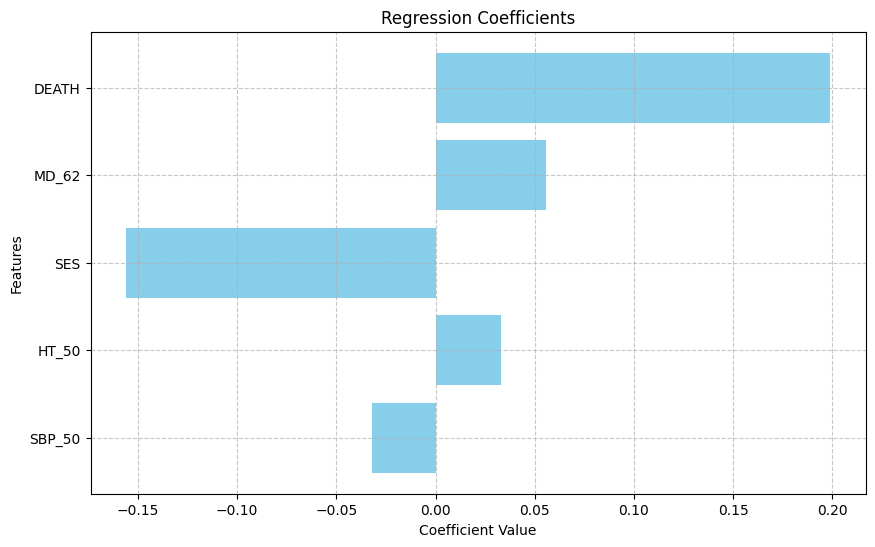

In [17]:
import matplotlib.pyplot as plt

def plot_regression_coefficients(model, feature_names):
    # Извлекаем коэффициенты регрессии
    coefficients = model.coef_

    # Создаем столбчатую диаграмму для визуализации коэффициентов
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, coefficients, color='skyblue')
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.title("Regression Coefficients")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Пример использования:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe, None)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)


In [19]:
# Выбираем числовые признаки
numeric_features = X_selected_rfe.select_dtypes(include=['int64']).columns.tolist()
# ВНИМАНИЕ: тут отбираются только float, если у вас не категориальные признаки имеют тип int - нужно исправить (например, в ручную указать нужные столбцы)

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_selected_rfe[numeric_features] = scaler.fit_transform(X_selected_rfe[numeric_features])


<ipython-input-19-e8fd9b11681e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected_rfe[numeric_features] = scaler.fit_transform(X_selected_rfe[numeric_features])


In [20]:
X_selected_rfe

,SBP_50,HT_50,SES,MD_62,DEATH
0,0.180328,0.214286,0.25,0.75,1.0
1,0.344262,0.571429,0.00,0.25,1.0
2,0.262295,0.642857,0.75,0.00,1.0
3,0.262295,0.785714,0.75,0.25,1.0
4,0.245902,0.357143,0.50,1.00,1.0
...,...,...,...,...,...
195,0.221311,0.357143,0.25,0.00,0.0
196,0.180328,0.571429,0.50,0.25,0.0
197,0.344262,0.357143,1.00,0.00,0.0
198,0.426230,0.357143,0.75,0.25,0.0


Regularization: None
Mean Absolute Error (MAE): 0.41
Mean Squared Error (MSE): 0.57
R^2 Score: 0.16


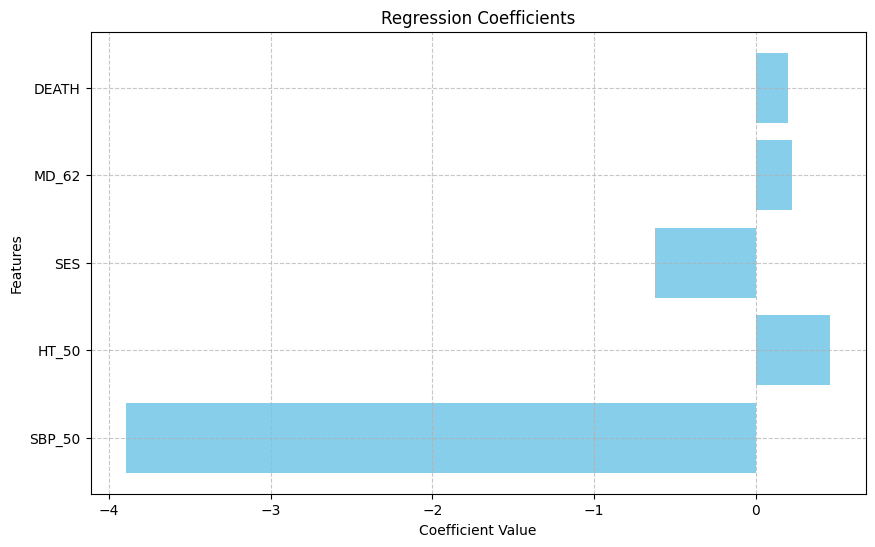

In [21]:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)

In [22]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик качества
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Absolute Error (MAE): 0.41
Mean Squared Error (MSE): 0.57
R^2 Score: 0.16


In [23]:
X

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,42,1,110,65,64,147,291,2,4,120,78,271,146,2,1
1,53,1,130,72,69,167,278,1,2,122,68,250,165,9,1
2,53,2,120,90,70,222,342,4,1,132,90,304,223,2,1
3,48,4,120,80,72,229,239,4,2,118,68,209,227,3,1
4,53,3,118,74,66,134,243,3,5,118,56,261,138,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,148,300,2,1,115,65,273,152,0,0
196,23,1,110,70,69,137,120,3,2,112,76,198,153,0,0
197,20,3,130,80,66,150,210,5,1,130,85,274,158,0,0
198,46,3,140,84,66,138,130,4,2,148,88,160,157,0,0


Regularization: l1
Mean Absolute Error (MAE): 0.39
Mean Squared Error (MSE): 0.49
R^2 Score: 0.27


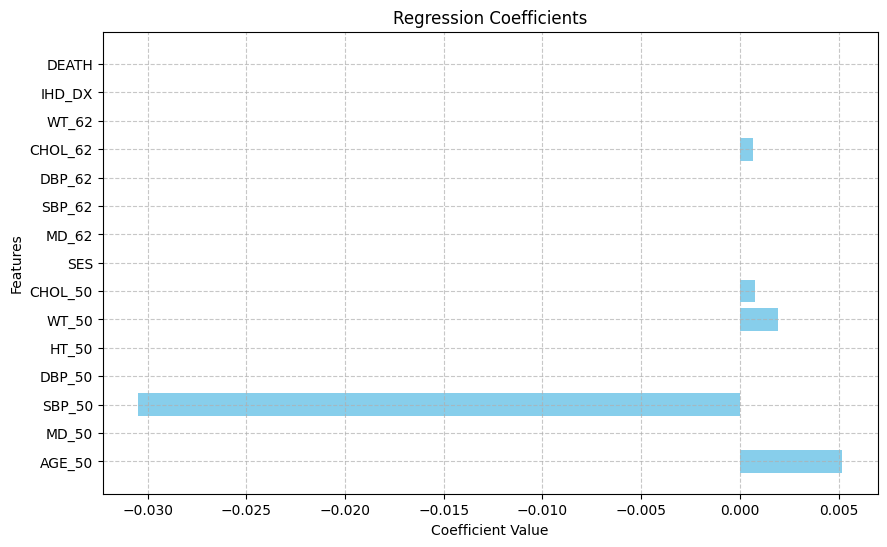

In [24]:
# L1-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l1')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)

Regularization: l2
Mean Absolute Error (MAE): 0.47
Mean Squared Error (MSE): 0.64
R^2 Score: 0.05


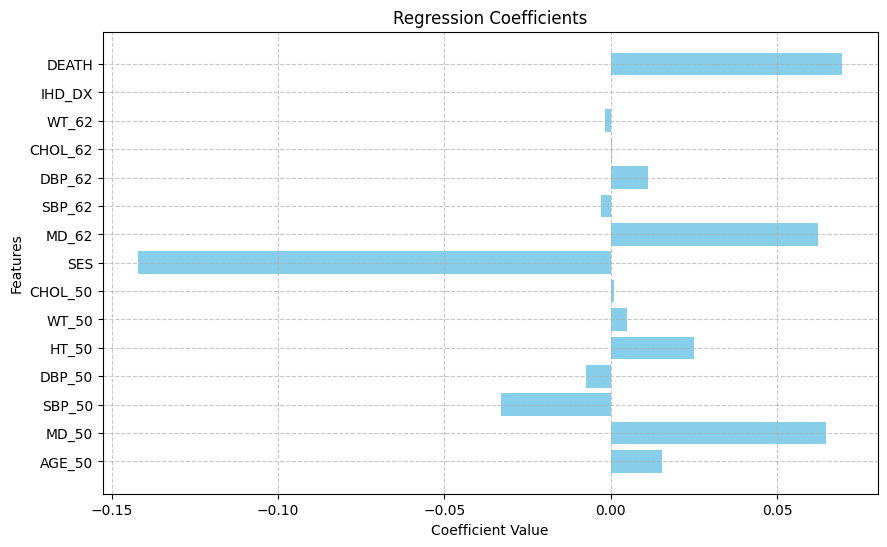

In [25]:
# L2-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l2')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)

Значения MAE варьируются от 0.37 до 0.47.
Наилучший результат был достигнут с регуляризацией l1 (MAE = 0.39), что указывает на то, что модель с l1 регуляризацией лучше предсказывает значения, чем модель без регуляризации.
MSE также показывает, что наилучшие результаты были достигнуты с l1 регуляризацией (MSE = 0.49).
Самый высокий MSE наблюдается в модели без регуляризации (MSE = 0.64), что говорит о том, что предсказания модели имеют большее отклонение от истинных значений.
Наилучший результат (R = 0.30) был достигнут с регуляризацией l1, что указывает на то, что модель с l1 регуляризацией объясняет около 30% вариации в данных.
Все остальные модели показывают низкие значения R (от 0.05 до 0.27), что говорит о плохой объяснительной способности.

Выводы
Регуляризация l1 показала лучшие результаты по всем метрикам по сравнению с другими подходами и без регуляризации. Это может указывать на то, что l1 регуляризация помогает уменьшить переобучение и улучшить обобщающую способность модели.
Модели с l2 регуляризацией показали худшие результаты.
Если смотреть на графики, корреляюцию, и в целом на данные, можно сделать вывод что скорее всего выбрана не подходящая переменная. На графиках видно что выбранная переменная сильно сказывается на предсказаниях, причём негативно. В следствии чего и происходит данная неполадка
